In [530]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [531]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [532]:
#Carga de dataset
#data = pd.read_csv('/content/pizza_v1.csv')
data = pd.read_csv('pizza_v1.csv')

In [533]:
print(data)

    company price_rupiah  diameter      topping           variant     size  \
0         A    Rp235,000      22.0      chicken  double_signature    jumbo   
1         A    Rp198,000      20.0    papperoni  double_signature    jumbo   
2         A    Rp120,000      16.0    mushrooms  double_signature  reguler   
3         A    Rp155,000      14.0  smoked beef  double_signature  reguler   
4         A    Rp248,000      18.0   mozzarella  double_signature    jumbo   
..      ...          ...       ...          ...               ...      ...   
124       E     Rp39,000       8.5         tuna        spicy tuna    small   
125       E     Rp72,000      12.0         tuna        spicy tuna   medium   
126       E     Rp99,000      14.0         tuna        spicy tuna    large   
127       E     Rp44,000       8.5         meat   BBQ_meat_fiesta    small   
128       E     Rp78,000      12.0         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese  
0           yes          yes  
1

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [535]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'price_rupiah'
columna_numerica = 'price'

columnas_eliminar = ['price_rupiah']
simbolo = 'Rp'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)
    data[columna_categorica] = data[columna_categorica].str.replace(',', '', regex=False)

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price         129 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 8.2+ KB


In [537]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [538]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [539]:
#resultado
print(data)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese  \
0          0      22.0        2        8     1            1             1   
1          0      20.0        7        8     1            1             1   
2          0      16.0        5        8     4            1             1   
3          0      14.0        9        8     4            1             0   
4          0      18.0        4        8     1            1             0   
..       ...       ...      ...      ...   ...          ...           ...   
124        4       8.5       10       16     5            1             1   
125        4      12.0       10       16     3            1             1   
126        4      14.0       10       16     2            1             1   
127        4       8.5        3        0     5            1             0   
128        4      12.0        3        0     3            0             0   

      price  
0    235000  
1    198000  
2    120000  
3    155000  
4    

In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    int64  
 3   variant       129 non-null    int64  
 4   size          129 non-null    int64  
 5   extra_sauce   129 non-null    int64  
 6   extra_cheese  129 non-null    int64  
 7   price         129 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.2 KB


In [541]:
# Lectura de Datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [542]:
print(X)
print('*'*25)
print(y)

     company  diameter  topping  variant  size  extra_sauce  extra_cheese
0          0      22.0        2        8     1            1             1
1          0      20.0        7        8     1            1             1
2          0      16.0        5        8     4            1             1
3          0      14.0        9        8     4            1             0
4          0      18.0        4        8     1            1             0
..       ...       ...      ...      ...   ...          ...           ...
124        4       8.5       10       16     5            1             1
125        4      12.0       10       16     3            1             1
126        4      14.0       10       16     2            1             1
127        4       8.5        3        0     5            1             0
128        4      12.0        3        0     3            0             0

[129 rows x 7 columns]
*************************
0      235000
1      198000
2      120000
3      155000
4     

In [543]:
def  featureNormalize(X):
#Crea una copia de la matriz de entrada X y la asigna a una nueva variable llamada X_norm.
    X_norm = X.copy()
#Inicializa una matriz de ceros con el mismo
#número de columnas que X y la asigna a una nueva variable llamada mu.
#shape[0], represents the number of rows, while the second element, shape[1], represents the number of column
    mu = np.zeros(X.shape[1])
#Inicializa una matriz de ceros con el mismo número de columnas que X y la asigna a una nueva variable llamada sigma.
    sigma = np.zeros(X.shape[1])
#Calcula la media de cada columna de X y asigna el resultado a la variable mu.
    mu = np.mean(X, axis = 0)
#Calcula la desviación estándar de cada columna de X y asigna el resultado a la variable sigma.
    sigma = np.std(X, axis = 0)
#Resta la media de cada columna de los valores correspondientes en esa columna, divide el resultado por la desviación estándar de esa columna y asigna el resultado a la variable X_norm.
    X_norm = (X - mu) / sigma
#Devuelve la matriz normalizada, junto con la media y la desviación estándar de cada columna.
    return X_norm, mu, sigma

La función featureNormalize normaliza las características de los datos en X restando la media y dividiendo por la desviación estándar de cada columna. La función devuelve tres valores: la matriz normalizada X_norm, la media mu y la desviación estándar sigma de cada columna de X.

In [544]:
# llama featureNormalize con los datos cargados en X como argumento
X_norm, mu, sigma = featureNormalize(X)
#Después de llamar a la función, el código imprime los valores de X, mu, sigma y X_norm. Esto muestra los datos originales en X, la media
#y desviación estándar calculadas por la función, y los datos normalizados en X_norm.
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)



     company  diameter  topping  variant  size  extra_sauce  extra_cheese
0          0      22.0        2        8     1            1             1
1          0      20.0        7        8     1            1             1
2          0      16.0        5        8     4            1             1
3          0      14.0        9        8     4            1             0
4          0      18.0        4        8     1            1             0
..       ...       ...      ...      ...   ...          ...           ...
124        4       8.5       10       16     5            1             1
125        4      12.0       10       16     3            1             1
126        4      14.0       10       16     2            1             1
127        4       8.5        3        0     5            1             0
128        4      12.0        3        0     3            0             0

[129 rows x 7 columns]
Media calculada: company          2.046512
diameter        12.976744
topping          5.

In [545]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [546]:
print(X)
print(len(X))

[[ 1.         -1.43132011  2.76790034 ... -1.27547153  0.83508588
   0.70710678]
 [ 1.         -1.43132011  2.15439665 ... -1.27547153  0.83508588
   0.70710678]
 [ 1.         -1.43132011  0.92738929 ...  0.7726923   0.83508588
   0.70710678]
 ...
 [ 1.          1.3662601   0.31388561 ... -0.59275026  0.83508588
   0.70710678]
 [ 1.          1.3662601  -1.37324952 ...  1.45541357  0.83508588
  -1.41421356]
 [ 1.          1.3662601  -0.29961808 ...  0.08997102 -1.19748163
  -1.41421356]]
129


In [547]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [548]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [85558.12495806 -7726.7629445  32211.32959401  2378.35168507
 -1824.99654244 -2065.80025214  5970.57694456  -430.73695076]
El valor predecido es (usando el descenso por el gradiente): 112714.3631


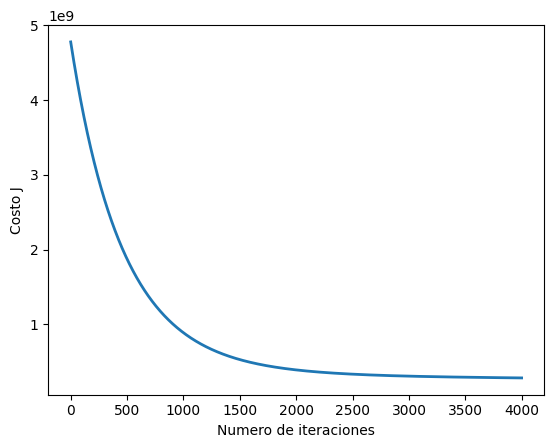

In [549]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1,1, 15.0, 5, 8,5 ,1 , 1]
#X_array[1:8] = (X_array[1:8] - mu) / sigma
X_array[1:8] = (X_array[1:8] - mu[:7]) / sigma[:7]
#price = np.dot(X_array, theta)   # Se debe cambiar esto
price = np.dot(X_array[:8], theta[:8])  # Se debe cambiar esto
print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [551]:
X_array = [1,1, 15.0, 5, 8,5 ,1 , 1]
X_array[1:8] = (X_array[1:8] -mu[:7]) / sigma[:7]

In [552]:
X_array[1:8]

[-0.7319250547113999,
 0.6206374462555869,
 -0.09226943675658465,
 -0.029558902630266178,
 1.4554135737523912,
 0.835085876453812,
 0.7071067811865476]

In [553]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [556]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


X_array = [1,1, 15.0, 5, 8,5 ,1 , 1]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de una pizza de 15 diametro : ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [87151.1627907  -4392.18147602 51290.7347671   3376.91541921
 -1130.44768195 17077.07985211  2848.72456125   474.91743267]
Precio predecido para una cada de una pizza de 15 diametro : $948670
